In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [24]:
# Load dataset
df = pd.read_csv("../data/Titanic-Dataset.csv")  # Adjust path if needed
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# Cell 2 — Dataset Overview

# Shape and info
print(f"Dataset Shape: {df.shape}")
df.info()

# Summary stats
df.describe(include="all").T


Dataset Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [26]:
# Cell 3 — Missing Values

missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Values": missing,
    "Percentage": missing_percent
})

missing_df[missing_df["Missing Values"] > 0]


,Missing Values,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


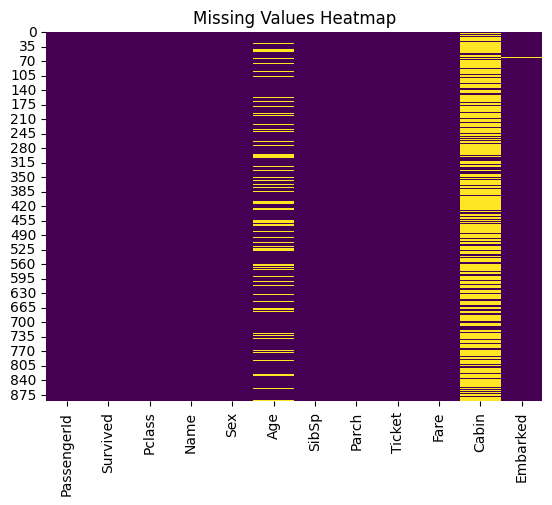

In [27]:
# Cell 4 — Visualisation of Missing Values

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


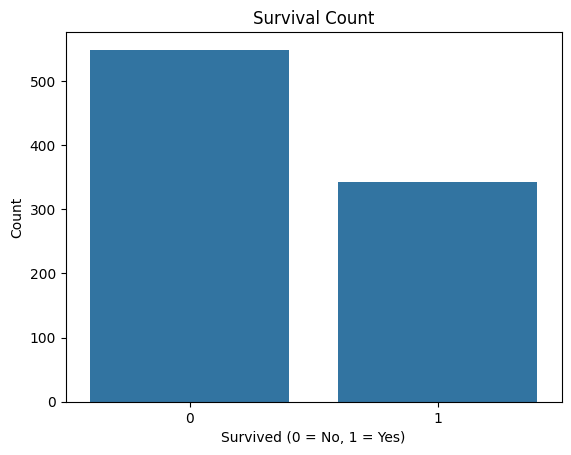

Survival Rate: 38.38%


In [28]:
# Cell 5 — Target Variable Distribution

sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Percentage survival
survival_rate = df["Survived"].mean() * 100
print(f"Survival Rate: {survival_rate:.2f}%")


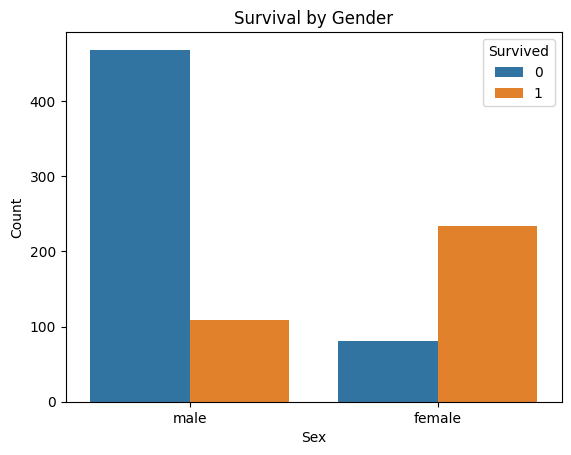

In [29]:
# Cell 6 — Survival by Gender

sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.ylabel("Count")
plt.show()


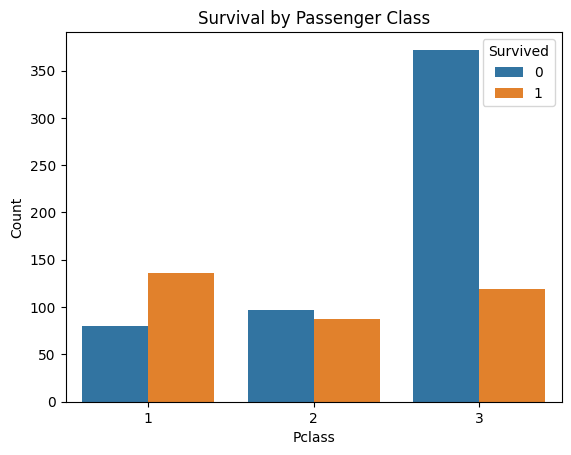

In [30]:
# Cell 7 — Survival by Pclass

sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.ylabel("Count")
plt.show()


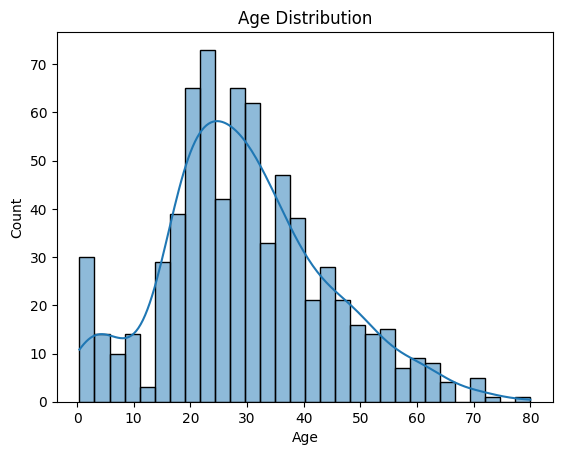

In [31]:
# Cell 8 — Age Distribution

sns.histplot(df["Age"], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()


In [32]:
# Cell 9 — Handling Missing Values

# Fill missing Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Fill missing Fare with median
df["Fare"].fillna(df["Fare"].median(), inplace=True)

# Fill missing Age with median (you can try more advanced imputation later)
df["Age"].fillna(df["Age"].median(), inplace=True)

# Drop Cabin if you don't plan to use it directly (or extract deck later)
# df.drop(columns=["Cabin"], inplace=True)


C:\Users\danan\AppData\Local\Temp\ipykernel_4600\2737731859.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
C:\Users\danan\AppData\Local\Temp\ipykernel_4600\2737731859.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [33]:
# Cell 10 — Feature Engineering

# Extract Title from Name
def extract_title(name):
    match = re.search(r",\s*([^\.]+)\.", name)
    return match.group(1).strip() if match else "Unknown"

df["Title"] = df["Name"].apply(extract_title)

# Group rare titles
replace_map = {
    "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs",
    "Lady": "Other", "Countess": "Other", "Capt": "Other",
    "Col": "Other", "Don": "Other", "Dr": "Other", "Major": "Other",
    "Rev": "Other", "Sir": "Other", "Jonkheer": "Other"
}
df["Title"] = df["Title"].replace(replace_map)
df["Title"] = df["Title"].where(df["Title"].isin(["Mr", "Mrs", "Miss", "Master"]), other="Other")

# Family features
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

# HasCabin feature
df["HasCabin"] = df["Cabin"].notna().astype(int)


In [34]:
# Cell 11 — Check Processed Data

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,0


In [35]:
# Cell 12 — Train/Test Split

from sklearn.model_selection import train_test_split

# Features and target
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", 
            "Embarked", "Title", "FamilySize", "IsAlone", "HasCabin"]
target = "Survived"

X = df[features]
y = df[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (712, 11)
Test shape: (179, 11)


In [43]:
# Save the test set for the Streamlit app
test_df = X_test.copy()
test_df["Survived"] = y_test.values  # add target column back
test_df.to_csv("../data/test.csv", index=False)
print("✅ test.csv saved in data/ folder")


✅ test.csv saved in data/ folder


In [36]:
# Step 3: Model Training - Cell 13

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_validate
import joblib
import numpy as np


In [37]:
# Cell 14 — Preprocessing Pipeline

numeric_features = ["Age", "SibSp", "Parch", "Fare", "FamilySize"]
categorical_features = ["Pclass", "Sex", "Embarked", "Title", "IsAlone", "HasCabin"]

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [38]:
# Cell 15 — Define Models

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42)
}


In [39]:
# Cell 16 — Cross-Validation & Metrics

scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]
cv_results = {}

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    scores = cross_validate(pipe, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)
    cv_results[name] = {metric: np.mean(scores[f"test_{metric}"]) for metric in scoring}

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(cv_results).T
results_df.sort_values(by="accuracy", ascending=False)


,accuracy,precision,recall,f1,roc_auc
SVM,0.825894,0.804199,0.721818,0.760229,0.851742
Logistic Regression,0.824495,0.788027,0.743569,0.764507,0.868326
Random Forest,0.799311,0.746595,0.725589,0.735743,0.852537


In [40]:
# Cell 17 — Select Best Model

best_model_name = results_df["accuracy"].idxmax()
print(f"Best model based on accuracy: {best_model_name}")

best_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", models[best_model_name])
])

# Fit on full training data
best_model.fit(X_train, y_train)


Best model based on accuracy: SVM


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       110
           1       0.81      0.75      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

ROC-AUC: 0.8379446640316206


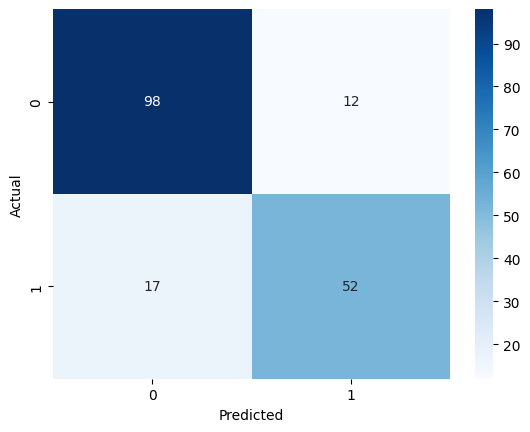

In [41]:
# Cell 18 — Evaluate on Test Set

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [42]:
# Cell 19 — Save Model

joblib.dump(best_model, "model.pkl")
print("Model saved to model.pkl")


Model saved to model.pkl
